In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

###requests는 파이썬에서 http 요청을 보낼 때 쓸 라이브러리, BeautifulSoup는 html에서 정보를 간단하게 빼오기 위해 사용할 라이브러리

In [22]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82967&m=1&p=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!--  앱 평가 리스트 시작 -->
<div class="subra" style="border-top:1px solid #ccc;">
<ul>
<li>
<div class="photo">
<img alt="Chanhee *** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Chanhee ***</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩 걸리면 핸드폰 자체가 프리징되서 폰 재부팅 하지않는 이상 아무것도 못함 쓰레기임
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="정* 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">정*</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					이체해야 하는데 지문인식 로그인이 안되네요 자꾸 앱이 꺼짐.. 아이디 로그인은 서비스 미가입자라고 안되고요 지문인식 빨리 어떻게좀 해주세요
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="JW

In [23]:
score_result = html.find('div', {'class': 'subra'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="photo">
<img alt="Chanhee *** 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">Chanhee ***</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩 걸리면 핸드폰 자체가 프리징되서 폰 재부팅 하지않는 이상 아무것도 못함 쓰레기임
				</p>
</div>
</li>

In [24]:
review_text = lis[0].findAll('p')[1].getText()
review_text


'\r\n\t\t\t\t\t앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩 걸리면 핸드폰 자체가 프리징되서 폰 재부팅 하지않는 이상 아무것도 못함 쓰레기임\r\n\t\t\t\t'

In [25]:
review_score=lis[0].find_all('span')[1].getText()
review_score

'1'

In [26]:
customer=lis[0].find_all('span')[0].getText()
customer

'Chanhee ***'

In [27]:
test_url1 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82967&m=1&p=1"
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for li in lis:
        review_text = li.find_all('p')[1].getText()
        review_score=li.find_all('span')[1].getText()
        customer=li.find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [28]:
test_url2 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82967&m=1&p=2"

In [29]:
a=get_data(test_url1)
b=get_data(test_url2)

In [30]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [31]:
print(type(b))

<class 'pandas.core.frame.DataFrame'>


In [32]:
a

,Customer,Review,Score
0,Chanhee ***,\r\n\t\t\t\t\t앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩...,1
1,정*,\r\n\t\t\t\t\t이체해야 하는데 지문인식 로그인이 안되네요 자꾸 앱이 꺼짐...,1
2,JW ***,\r\n\t\t\t\t\t오류가 너무 많다 지문인식을 몇번이나 새로 등록했는지 모른...,1
3,Jera ***,\r\n\t\t\t\t\t진짜 깜짝 놀라서 굳이 굳이 앱평가하기까지 이 새벽에 뛰쳐...,1
4,Jinsu ***,\r\n\t\t\t\t\tPKCS7 전자 서명 오류로 인증서가 정상적으로 제출되지 ...,1
5,근*,\r\n\t\t\t\t\t진짜 최악의 앱 그 자체. 군대에서 나라사랑카드와 사회에서...,1
6,SSS ***,\r\n\t\t\t\t\t진짜 하다하다 답답해서 글 남깁니다. 금융어플이 이렇게 최...,1
7,이승*,\r\n\t\t\t\t\t갑자기 안됩니다. 재설치후 다시 해보려했는데 휴대폰 유심및...,1
8,배서*,\r\n\t\t\t\t\t업데이트 이후 앱 실행하면 V3가 실행이 안됩니다..몇시간...,1
9,유재*,\r\n\t\t\t\t\t이딴식으로 운영할꺼면 쳐만들지를 마시지; 다른것도아니고 돈...,1


In [33]:
b

,Customer,Review,Score
0,GRACE Y***,\r\n\t\t\t\t\t업데이트 후에 신한플러스 이용등록하라고 뜨는데 확인 누르면...,1
1,**,\r\n\t\t\t\t\t기기변경으로 로그인할려고 번호인증하고다했는데 마지막 확인에...,1
2,박은*,\r\n\t\t\t\t\t어쩌라는거지 갑자기? 이체하려면 전화나문자 확인인데 확인하...,1
3,박승*,\r\n\t\t\t\t\t너무 화납니다. 이것 때문에 상품한개가 날라갔네요.. 업데...,1
4,마후*,\r\n\t\t\t\t\t지금 원래 패턴 로그인 했었는데 갑자기 지문으로 바뀌고 지...,1
5,hyon***,\r\n\t\t\t\t\t타은행 반영이 안된다고 조치 좀 해달라고 글 썼었는데 없어...,1
6,홍돌**,\r\n\t\t\t\t\t해외서 사용중인데 잘 됐었는데 하루이틀 전부터 네트워크오류...,1
7,Elle***,\r\n\t\t\t\t\t이틀전부터 계좌이체 중간에 자꾸 앱이 꺼지네요? 그 전까진...,1
8,정재*,\r\n\t\t\t\t\t잘사용하다 비밀번호마지막 숫자만 안 눌립니다. 비번이 11...,1
9,Hoon ***,"\r\n\t\t\t\t\t송금 할 때, 문자 인증 요청하고, 문자 확인하고 다시 돌...",1


In [34]:
pd.concat([a,b],ignore_index=True)

,Customer,Review,Score
0,Chanhee ***,\r\n\t\t\t\t\t앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩...,1
1,정*,\r\n\t\t\t\t\t이체해야 하는데 지문인식 로그인이 안되네요 자꾸 앱이 꺼짐...,1
2,JW ***,\r\n\t\t\t\t\t오류가 너무 많다 지문인식을 몇번이나 새로 등록했는지 모른...,1
3,Jera ***,\r\n\t\t\t\t\t진짜 깜짝 놀라서 굳이 굳이 앱평가하기까지 이 새벽에 뛰쳐...,1
4,Jinsu ***,\r\n\t\t\t\t\tPKCS7 전자 서명 오류로 인증서가 정상적으로 제출되지 ...,1
5,근*,\r\n\t\t\t\t\t진짜 최악의 앱 그 자체. 군대에서 나라사랑카드와 사회에서...,1
6,SSS ***,\r\n\t\t\t\t\t진짜 하다하다 답답해서 글 남깁니다. 금융어플이 이렇게 최...,1
7,이승*,\r\n\t\t\t\t\t갑자기 안됩니다. 재설치후 다시 해보려했는데 휴대폰 유심및...,1
8,배서*,\r\n\t\t\t\t\t업데이트 이후 앱 실행하면 V3가 실행이 안됩니다..몇시간...,1
9,유재*,\r\n\t\t\t\t\t이딴식으로 운영할꺼면 쳐만들지를 마시지; 다른것도아니고 돈...,1


In [42]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82967&m=1&p="
#100페이지를 크롤링하는 함수
def Mycrawl(page):
    for i in range(1,page):
        if(i==1):
            addr=test_url+str(i)
            xdata=get_data(addr)
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([xdata,ydata])
        else:
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([zdata,ydata],ignore_index=True)
    return zdata
        #get_data(addr)[1]
        #newtemp_list=a.append(get_data(addr))
    #return newtemp_list

In [43]:
Mycrawl(3)

,Customer,Review,Score
0,Chanhee ***,\r\n\t\t\t\t\t앱이 시작할때 무한로딩 걸리는 경우가 너무 많음 무한 로딩...,1
1,정*,\r\n\t\t\t\t\t이체해야 하는데 지문인식 로그인이 안되네요 자꾸 앱이 꺼짐...,1
2,JW ***,\r\n\t\t\t\t\t오류가 너무 많다 지문인식을 몇번이나 새로 등록했는지 모른...,1
3,Jera ***,\r\n\t\t\t\t\t진짜 깜짝 놀라서 굳이 굳이 앱평가하기까지 이 새벽에 뛰쳐...,1
4,Jinsu ***,\r\n\t\t\t\t\tPKCS7 전자 서명 오류로 인증서가 정상적으로 제출되지 ...,1
5,근*,\r\n\t\t\t\t\t진짜 최악의 앱 그 자체. 군대에서 나라사랑카드와 사회에서...,1
6,SSS ***,\r\n\t\t\t\t\t진짜 하다하다 답답해서 글 남깁니다. 금융어플이 이렇게 최...,1
7,이승*,\r\n\t\t\t\t\t갑자기 안됩니다. 재설치후 다시 해보려했는데 휴대폰 유심및...,1
8,배서*,\r\n\t\t\t\t\t업데이트 이후 앱 실행하면 V3가 실행이 안됩니다..몇시간...,1
9,유재*,\r\n\t\t\t\t\t이딴식으로 운영할꺼면 쳐만들지를 마시지; 다른것도아니고 돈...,1


In [44]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

import pandas as pd

In [45]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=82967&m=1&p="
df=Mycrawl(30)

In [46]:
print(df.shape)

(300, 3)


In [47]:
df.head()
df.tail()

,Customer,Review,Score
295,정성*,\r\n\t\t\t\t\t어플 접속이 안되서 삭제후 재설치후에도 접속이 안됩니다.....,1
296,Grr***,\r\n\t\t\t\t\t삼성 S8 쓰고있고 폰 업데이트 이후 앱이 계속 충돌나서 ...,1
297,노지*,\r\n\t\t\t\t\t오ㅐ이래요?아..짜증나\r\n\t\t\t\t,1
298,이준*,\r\n\t\t\t\t\t재직증명서들고 신한은행에 가서 비대면 통장 만든거 이체한도...,1
299,요술**,\r\n\t\t\t\t\t연말어 어플이왜안돼 아 짜증나네\r\n\t\t\t\t,1


In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [50]:
alpha=str(df['Review'])

In [53]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 3000,
    height = 3000,
    stopwords=['t','/','r','n',"아니","갑자기"],background_color="white"
)
w=w.generate(alpha)


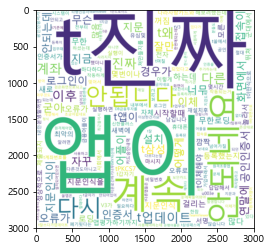

In [54]:
plt.imshow(w,interpolation='bilinear')